In [1]:
from torchvision import models
import torch
import torch.nn as nn
import cv2
import matplotlib.pyplot as plt
import numpy as np
import Backbone_44
import Channel_Attention
import Spatial_Attention
import FC
import Face_Fake_Net

torch.Size([2, 3, 224, 224])

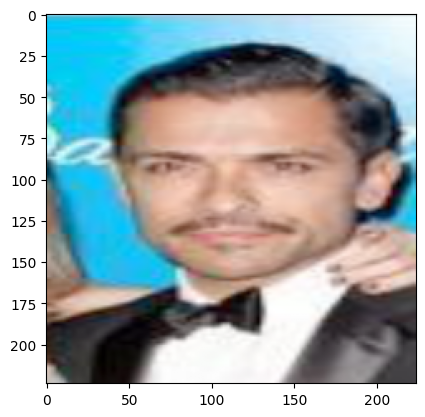

In [2]:
image = cv2.imread('D:\\Comit\\FAS\\data\\CelebA_Spoof\\Data\\image_preprocessed\\live_face\\494418.png')
image = cv2.resize(image,(224,224))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image = image / 255.0
plt.imshow(image)
image = image.astype(np.float32)
image = torch.tensor(image)
image = image.permute(2, 0, 1).unsqueeze(0)
image = torch.cat((image, image), dim=0)
image.shape

In [10]:
image.shape

torch.Size([2, 3, 224, 224])

In [19]:
channel = Channel_Attention.Channel_Attention(channels = 2048)
backbone = Backbone_44.Backbone_44()
spatial = Spatial_Attention.Spatial_Attention()
x = backbone(image)
x = spatial(x)
x.shape

torch.Size([2, 2048, 7, 7])

In [1]:
import pandas as pd

df = pd.read_csv("D:\\Comit\\FAS\\data\\CelebA_Spoof\\Data\\image_preprocessed\\annotation\\test_annotation.csv")
df

OSError: [Errno 22] Invalid argument: 'D:\\Comit\\FAS\\data\\CelebA_Spoof\\Data\\image_preprocessed\x07nnotation\test_annotation.csv'